<a href="https://colab.research.google.com/github/benpardede/Proba_Project/blob/main/Final_Intro_to_Proba_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
import scipy.stats as stats
import math
from statsmodels.stats.proportion import proportions_ztest
path = '/content/gdrive/MyDrive/proba project/insurance.csv'

df = pd.read_csv(path)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analisa Descriptive Statistics
1. Berapa rata-rata umur pada data tersebut?

In [ ]:
df.mean(numeric_only = True)['age'].round(0)

39.0

2. Berapa rata-rata nilai BMI dari yang merokok?

In [ ]:
average_smoker = df.groupby(['smoker']).mean(numeric_only = True)['bmi'].round(0)
print(average_smoker)

smoker
no     31.0
yes    31.0
Name: bmi, dtype: float64


3. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

In [ ]:
variance_smoker = df.groupby(['smoker']).var(numeric_only = True)['charges'].round(0)
print(variance_smoker)

smoker
no      35925420.0
yes    133207311.0
Name: charges, dtype: float64


4. Apakah rata-rata umur perokok laki-laki dan perempuan sama?

In [ ]:
gender_smoker = df.groupby(['smoker','sex']).mean(numeric_only = True)['age'].round(0)
print(gender_smoker)

smoker  sex   
no      female    40.0
        male      39.0
yes     female    39.0
        male      38.0
Name: age, dtype: float64


5. Mana yang lebih tinggi, rata-rata tagihan kesehatan perkok dan non perokok?

In [ ]:
charges_smoker = df.groupby(['smoker']).mean(numeric_only = True)['charges'].round(2)
print(charges_smoker)

smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64


## Analisa Variabel Diskrit
1. Gender mana yang memiliki tagihan paling tinggi?

In [ ]:
charges_max = df.groupby(['sex']).max()['charges'].round(2)
print(charges_max)

sex
female    63770.43
male      62592.87
Name: charges, dtype: float64


2. Distribusi peluang tagihan di tiap-tiap region

In [ ]:
df.groupby(['region']).sum(numeric_only = True)['charges']

region
northeast    4.343669e+06
northwest    4.035712e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64

In [ ]:
total_tagihan  = df.sum()['charges']
c_ne = 4.343669e+06 / total_tagihan
print(f'Tagihan Northeast = {c_ne: .2f}%')
c_nw = 4.035712e+06 / total_tagihan
print(f'Tagihan Northwest = {c_nw: .2f}%')
c_se = 5.363690e+06 / total_tagihan
print(f'Tagihan Southeast = {c_se: .2f}%')
c_sw = 4.012755e+06 / total_tagihan
print(f'Tagihan Southwest = {c_sw: .2f}%')

Tagihan Northeast =  0.24%
Tagihan Northwest =  0.23%
Tagihan Southeast =  0.30%
Tagihan Southwest =  0.23%


3. Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [ ]:
region = df['region'].value_counts()
print(region)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
se = 364
sw = 325
nw = 325
ne = 324

total_region = se + sw + nw + ne
print(total_region)


1338


In [ ]:
p_se = (se / total_region) * 100
print(f'Proporsi banyak orang di region Southeast = {p_se: .2f}%')
p_sw = (sw / total_region) *100
print(f'Proporsi banyak orang di region Southwest = {p_sw: .2f}%')
p_nw = (nw / total_region) * 100
print(f'Proporsi banyak orang di region Northwest = {p_nw: .2f}%')
p_ne = (ne / total_region) * 100
print(f'Proporsi banyak orang di region Northeast = {p_ne: .2f}%')

Proporsi banyak orang di region Southeast =  27.20%
Proporsi banyak orang di region Southwest =  24.29%
Proporsi banyak orang di region Northwest =  24.29%
Proporsi banyak orang di region Northeast =  24.22%


4. Mana lebih tinggi proporsi Perokok dan Non-Perokok?

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
sum_data_smoker = 1064 + 274
prop_yes = (274 / sum_data_smoker)*100
print(f'Proporsi data perokok sebesar {prop_yes: .2f}%')
prop_no = (1064 / sum_data_smoker)*100
print(f'Proporsi data non-perokok sebesar {prop_no: .2f}%')

Proporsi data perokok sebesar  20.48%
Proporsi data non-perokok sebesar  79.52%


In [ ]:
table = pd.crosstab(df['sex'],
            df['smoker'],
            margins = True)
table

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


5. Berapa peluang orang tersebut perempuan diketahui dia adalah perokok?

In [ ]:
n_perokok = 115 + 159
n_female = 115
p_female_perokok = n_female / n_perokok
print(f'peluang orang tersebut perempuan diketahui dia perokok adalah sebesar {p_female_perokok: .2f}%')

peluang orang tersebut perempuan diketahui dia perokok adalah sebesar  0.42%


6. Berapa peluang orang tersebut laki-laki diketahui dia adalah perokok?

In [ ]:
n_perokok = 115 + 159
n_male = 159
p_male_perokok = n_male / n_perokok
print(f'peluang orang tersebut laki-laki diketahui dia perokok adalah sebesar {p_male_perokok: .2f}%')

peluang orang tersebut laki-laki diketahui dia perokok adalah sebesar  0.58%


## Analisa Variabel Kontinu
Anda bisa menggunakan 2 pertanyaan dibawah ini untuk pengecekan kondisi pada data tagihan kesehatan.
1. Mana yang lebih mungkin terjadi

  a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
atau

  b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

2. Mana yang lebih mungkin terjadi

  a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k, atau

  b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df[(df['sex'] == 'female') & (df['age'] < 25)]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
31,18,female,26.315,0,no,northeast,2198.18985
32,19,female,28.600,5,no,southwest,4687.79700
40,24,female,26.600,0,no,northeast,3046.06200
46,18,female,38.665,2,no,northeast,3393.35635
...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424
1331,23,female,33.400,0,no,southwest,10795.93733
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [ ]:
#  a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k (BMI>25 & bill > 16700)
satu_a = len(df[(df['bmi'] > 25) & (df['charges'] > 16700)])
satu_b = len(df)
kondisi_1a = satu_a / satu_b
print(f' Peluang seseorang mendapatkan tagihan kesehatan di atas 16.7K dengan nilai BMI di atas 25 adalah {kondisi_1a: .2f}')

 Peluang seseorang mendapatkan tagihan kesehatan di atas 16.7K dengan nilai BMI di atas 25 adalah  0.21


In [ ]:
# b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k
dua_a = len(df[(df['bmi'] < 25) & (df['charges'] > 16700)])
dua_b = len(df)
kondisi_1b = (dua_a/ dua_b)
print(f' Peluang seseorang mendapatkan tagihan kesehatan di atas 16.7K dengan nilai BMI di bawah 25 adalah {kondisi_1b: .2f}')

 Peluang seseorang mendapatkan tagihan kesehatan di atas 16.7K dengan nilai BMI di bawah 25 adalah  0.04


In [ ]:
kondisi_a = (df['bmi'] > 25) & (df['charges'] > 16700)
table_2 = pd.crosstab(df['smoker'],
                      kondisi_a,
                      margins = True)
table_2

col_0,False,True,All
smoker,,,
no,996,68,1064
yes,59,215,274
All,1055,283,1338


In [ ]:
#a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
kondisi_2a = 215 / 283
print(f'Seeseorang Perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7K adalah {kondisi_2a: .2f}')

Seeseorang Perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7K adalah  0.76


In [ ]:
#b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
kondisi_2b =  68 / 283
print(f'Seeseorang Non-Perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7K adalah {kondisi_2b: .2f}')

Seeseorang Non-Perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7K adalah  0.24


#4 - Analisa Korelasi Variabel
Anda bisa memilih mengecek korelasi tagihan kesehatan minimal dengan 2 variabel lainnya,
misalnya dengan bmi dan variable tanggungan anak.

In [ ]:
# Encoding sex coulmn

df.replace({"sex": {"female": 0, "male": 1}}, inplace = True)

# Encoding smoker column

df.replace({"smoker": {"no": 0, "yes": 1}}, inplace = True)

# Encoding region column

df.replace({"region": {"northeast": 0, "northwest": 1, "southeast": 2, "southwest": 3}}, inplace = True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

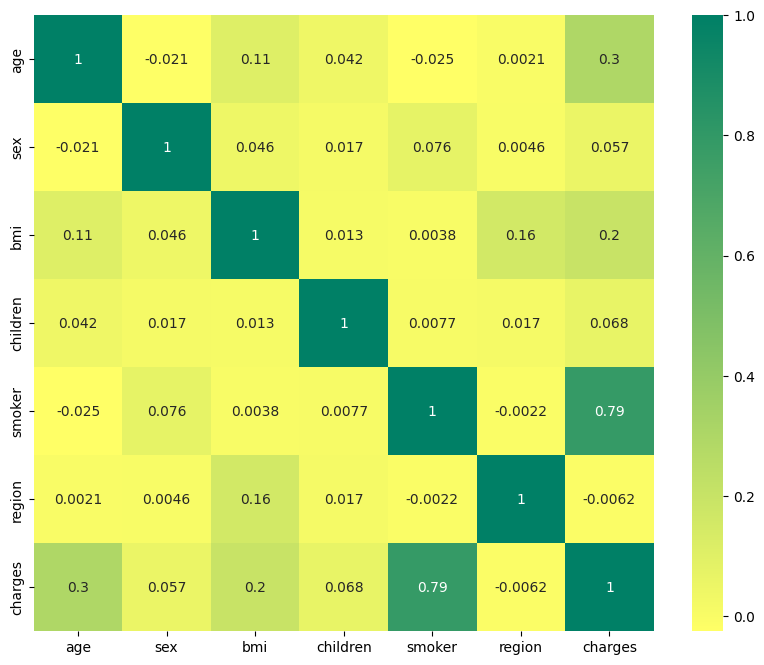

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')

In [ ]:
corr_1 = df[['smoker', 'charges']].corr()
corr_1

,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


In [ ]:
corr_2 = df[['age', 'charges']].corr()
corr_2

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


#5 - Pengujian Hipotesis
Anda bisa mengecek 3 hipotesis tentang karakter populasi dari data. Hipotesis bisa anda pilih
adalah
1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Proporsi perokok laki laki lebih besar dari perempuan
3. Tagihan kesehatan laki-laki lebih besar dari perempuan

In [ ]:
df2 = pd.read_csv(path)
df2.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

H0 = rata-rata Tagihan  Perokok <= rata-rata Tagihan Non_perokok

H1 = rata-rata Tagihan  Perokok > rata-rata Tagihan Non_Perokok

In [ ]:
#grouping smoker & non_smoker
smoker = df2[df2['smoker'] == 'yes']['charges']
non_smoker = df2[df2['smoker'] == 'no']['charges']
print(smoker)
print(non_smoker)

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


In [ ]:
#hitung uji t independen
t_stat, p_value = stats.ttest_ind(smoker, non_smoker, alternative = 'greater' )

#level of significance
alpha = 0.05

print(t_stat)
print(f'{p_value}')

46.66492117272371
4.135717921089551e-283


In [ ]:
#Kesimpulan
if p_value < alpha :
  print('Tolak H0,\nrata-rata tagihan kesehatan perokok lebih tinggi daripada tagihan non-perokok')
else :
    print('Gagal Tolak H0, \npunya cukup bukti untuk terima H0')

Tolak H0,
rata-rata tagihan kesehatan perokok lebih tinggi daripada tagihan non-perokok


In [46]:
#2. Proporsi perokok laki laki lebih besar dari perempuan

# H0 = Proporsi Perokok Laki-Laki <= Proporsi Perokok Perempuan
# H1 = Proporsi Perokok Laki-Laki > Proporsi Perokok Perempuan

#grouping perokok laki-laki & perokok perempuan
perokok_laki = len(df2[(df2['sex'] == 'male') & (df2['smoker'] == 'yes')])
perokok_perempuan = len(df2[(df2['sex'] == 'female') & (df2['smoker'] == 'yes')])

perokok_laki
perokok_perempuan

115

In [47]:
#total perokok
total_perokok = perokok_laki + perokok_perempuan

#uji proporsi
count = [perokok_laki, perokok_perempuan]
total = [total_perokok, total_perokok]
z_statistic, p_value = proportions_ztest(count, total, alternative = 'larger')

#level of significance
alpha_2 = 0.05

print('z_statistic:', z_statistic)
print(f'p_value: {p_value: .5f}')

z_statistic: 3.759173693953749
p_value:  0.00009


In [48]:
#Kesimpulan
if p_value < alpha :
  print('Tolak H0,\nproporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan')
else :
    print('Gagal Tolak H0, \nmempunyai cukup bukti untuk terima H0 ')

Tolak H0,
proporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan


In [50]:
charges_male

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
8        6406.41070
           ...     
1324     4239.89265
1325    13143.33665
1327     9377.90470
1329    10325.20600
1333    10600.54830
Name: charges, Length: 676, dtype: float64

In [ ]:
# 3. Tagihan kesehatan laki-laki lebih besar dari perempuan
# H0: tagihan kesehatan laki-laki <= tagihan kesehatan perempuan.
# H1: tagihan kesehatan laki-laki > tagihan kesehatan perempuan.

#grouping tagihan kesehatan laki-laki & perempuan
charges_female = df2[df2['sex'] == 'female']['charges']
charges_male = df2[df2['sex'] == 'male']['charges']

#hitung uji t independen
t_stat, p_value = stats.ttest_ind(charges_female, charges_male , alternative = 'greater' )

#level of significance
alpha = 0.05

print(t_stat)
print(p_value)

-2.097546590051688
0.981933639497035


In [ ]:
#Kesimpulan
if p_value < alpha :
  print('Tolak H0,\ntagihan kesehatan laki-laki lebih besar daripada tagihan kesehatan perempuan ')
else :
    print('Gagal Tolak H0, \npunya cukup bukti untuk membuktikan H0')

Gagal Tolak H0, 
punya cukup bukti untuk membuktikan H0
